# Exploratory Data Analysis-Retail(SampleSuperstore Dataset)

I performed ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’ and as a business manager, I tried to find out the weak areas where the company can work to 
make more profit and What all business problems can be derived by exploring the data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("SampleSuperstore.csv")

### Understanding the Data

In [ ]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [ ]:
data.shape

(9994, 13)

**From this we can see that dataset has 9994 rows and 13 columns.**

In [ ]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [ ]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [ ]:
data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [ ]:
data['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [ ]:
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [ ]:
data['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [ ]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**Above data shows us that there are no null values in our dataset.**

In [ ]:
newdata = data.drop(['Country','Postal Code'],axis=1)

In [ ]:
newdata.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**Now we'll add 2 columns (cost and profit%) in this new dataset. **

In [ ]:
newdata['Cost']= newdata['Sales'] - newdata['Profit']
newdata['Profit%']= (newdata['Profit']/newdata['Cost'])*100

In [ ]:
newdata.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit%
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,220.0464,19.047619
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,512.3580,42.857143
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.7486,88.679245
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1340.6085,-28.571429
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,19.8516,12.676056


### Relationship Analysis

In [ ]:
corelation = newdata.corr()

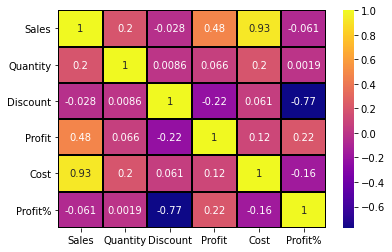

In [ ]:
sns.heatmap(corelation,annot=True ,cmap='plasma',linewidths=1 ,linecolor='black')

# ***Now we'll divide this dataset into 2 different Dataset:***
***Dataset-1 : analyse_loss*** - It would have entries where loss is suffered

***Dataset-2 : analyse_profit*** - It would have entries where profit is made.

In [ ]:
analyse_loss=newdata.loc[newdata['Profit%']<0]

In [ ]:
analyse_loss.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit%
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1340.6085,-28.571429
14,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580,192.6680,-64.285714
15,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160,6.3600,-60.000000
23,Second Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Chairs,71.3720,2,0.30,-1.0196,72.3916,-1.408451
27,Standard Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522,4748.4822,-35.064935


In [ ]:
analyse_loss.reset_index(drop=True)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit%
0,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1340.6085,-28.571429
1,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580,192.6680,-64.285714
2,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160,6.3600,-60.000000
3,Second Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Chairs,71.3720,2,0.30,-1.0196,72.3916,-1.408451
4,Standard Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522,4748.4822,-35.064935
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,Standard Class,Corporate,Bryan,Texas,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176,58.2036,-61.538462
1867,Standard Class,Home Office,Akron,Ohio,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936,10.3356,-44.444444
1868,Standard Class,Consumer,San Bernardino,California,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960,723.5280,-5.555556
1869,Second Class,Corporate,Los Angeles,California,West,Furniture,Tables,71.0880,2,0.20,-1.7772,72.8652,-2.439024


In [ ]:
analyse_loss.shape

(1871, 13)

In [ ]:
analyse_loss.value_counts()

Ship Mode       Segment      City           State     Region   Category         Sub-Category  Sales    Quantity  Discount  Profit      Cost       Profit%   
Standard Class  Home Office  Columbus       Ohio      East     Furniture        Chairs        281.372  2         0.3       -12.0588    293.4308   -4.109589     2
                Consumer     Chicago        Illinois  Central  Office Supplies  Storage       35.168   2         0.2       -8.3524     43.5204    -19.191919    2
                             Houston        Texas     Central  Office Supplies  Binders       2.934    3         0.8       -4.9878     7.9218     -62.962963    2
Second Class    Corporate    Chicago        Illinois  Central  Office Supplies  Binders       3.564    3         0.8       -6.2370     9.8010     -63.636364    2
Standard Class  Consumer     New York City  New York  East     Furniture        Bookcases     353.568  2         0.2       -44.1960    397.7640   -11.111111    2
                                 

**So from above we can say that company is suffering loss in 1871 entries.**

In [ ]:
analyse_loss['City'].mode()

0    Philadelphia
dtype: object

In [ ]:
analyse_loss['City'].value_counts()

Philadelphia      250
Houston           185
Chicago           155
Dallas             73
Columbus           51
                 ... 
Boca Raton          1
Hesperia            1
Baltimore           1
Elyria              1
San Bernardino      1
Name: City, Length: 229, dtype: int64

**C1: Philadelphia has most number of loss entries followed by Houston,Chicago,Dallas,etc.**

In [ ]:
z=analyse_loss['Category'].value_counts()

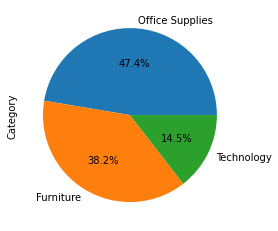

In [ ]:
z.plot.pie(autopct="%.1f%%")

**C2: 47.4% loss is suffered in Office Supplies followed by 38.2% in Furniture. **

In [ ]:
y=analyse_loss['Sub-Category'].value_counts()

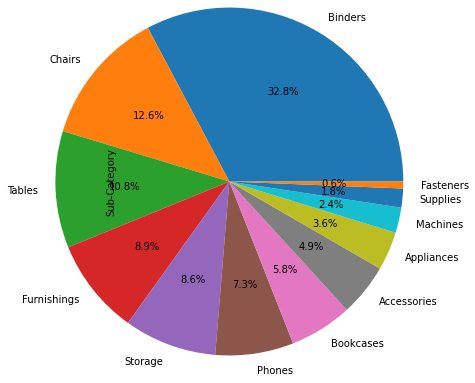

In [ ]:
y.plot.pie(autopct="%.1f%%",radius=2)

**C3: From the above pie chart, we can conclude that Binders(Cateogry: Office supplies)should be fixed as it contributes highest in loss.**

In [ ]:
w=analyse_loss['Ship Mode'].value_counts()

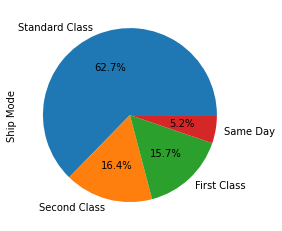

In [ ]:
w.plot.pie(autopct="%.1f%%")

**C4: Standard Class is the class in shipping mode which is repeated most in loss entries.**

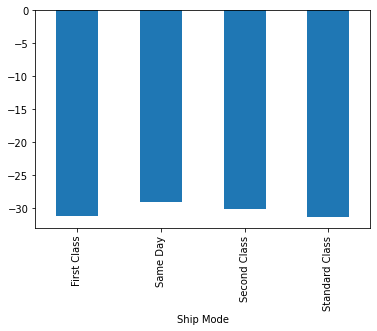

In [ ]:
analyse_loss.groupby('Ship Mode')['Profit%'].mean().plot.bar()

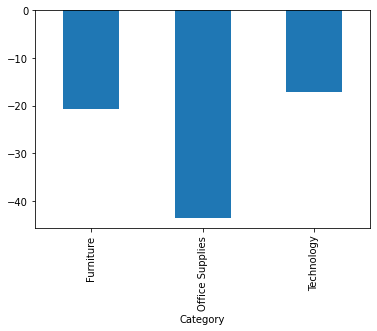

In [ ]:
analyse_loss.groupby('Category')['Profit%'].mean().plot.bar()

**C5 : Category "Office Supplies" made most loss .**

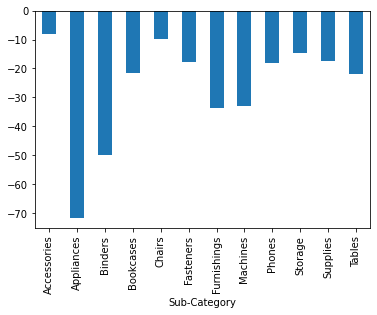

In [ ]:
analyse_loss.groupby('Sub-Category')['Profit%'].mean().plot.bar()

**C6: Here, we can see that Appliances and Binders have suffered most loss.**

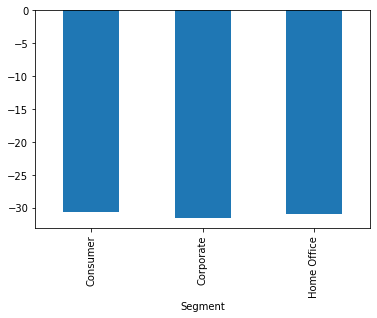

In [ ]:
analyse_loss.groupby('Segment')['Profit%'].mean().plot.bar()

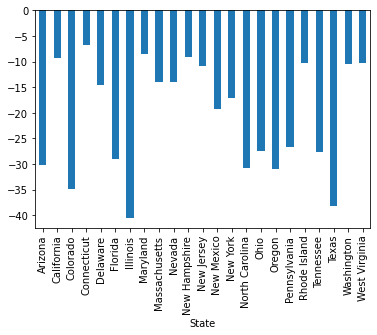

In [ ]:
analyse_loss.groupby('State')['Profit%'].mean().plot.bar()

C7: Maximum loss is suffered int Illinois and Texas followed by other cities as represented in the above bar chart.

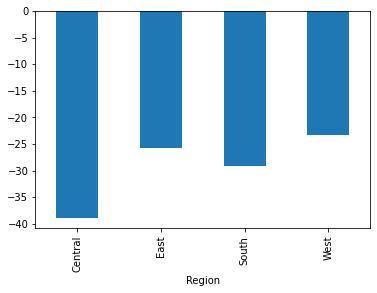

In [ ]:
analyse_loss.groupby('Region')['Profit%'].mean().plot.bar()

# From C1,C2,C3,C4,C5,C6 and C7 we found where losses are suffered most ,so by minimizing these losses we can ***Increase the Profit*** .

# Untill now we made conclusions based on losses suffered.Now we will see where the profit is gained more and how we can increase this profit.

---



In [ ]:
analyse_profit=newdata.loc[newdata['Profit%']>0]

In [ ]:
analyse_profit.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit%
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.960,2,0.0,41.9136,220.0464,19.047619
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.940,3,0.0,219.5820,512.3580,42.857143
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.620,2,0.0,6.8714,7.7486,88.679245
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.368,2,0.2,2.5164,19.8516,12.676056
5,Standard Class,Consumer,Los Angeles,California,West,Furniture,Furnishings,48.860,7,0.0,14.1694,34.6906,40.845070


In [ ]:
analyse_profit.reset_index(drop=True)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit%
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.960,2,0.0,41.9136,220.0464,19.047619
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.940,3,0.0,219.5820,512.3580,42.857143
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.620,2,0.0,6.8714,7.7486,88.679245
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.368,2,0.2,2.5164,19.8516,12.676056
4,Standard Class,Consumer,Los Angeles,California,West,Furniture,Furnishings,48.860,7,0.0,14.1694,34.6906,40.845070
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8053,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.248,3,0.2,4.1028,21.1452,19.402985
8054,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.960,2,0.0,15.6332,76.3268,20.481928
8055,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.576,2,0.2,19.3932,239.1828,8.108108
8056,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.600,4,0.0,13.3200,16.2800,81.818182


In [ ]:
analyse_profit.shape

(8058, 13)

As we noticed earlier while minimizing loss no of entries that suffered loss are 1871 and no.of entries that gained profit are 8058 which are nothing but rows obtained in analyse_loss and analyse_profit.

In [ ]:
analyse_profit['City'].value_counts()

New York City     868
Los Angeles       705
San Francisco     482
Seattle           406
Philadelphia      283
                 ... 
Cuyahoga Falls      1
Atlantic City       1
Lindenhurst         1
Baytown             1
Whittier            1
Name: City, Length: 513, dtype: int64

**So most no. of profit entries are done in NYC followed by LA further followed by San-Francisco.**

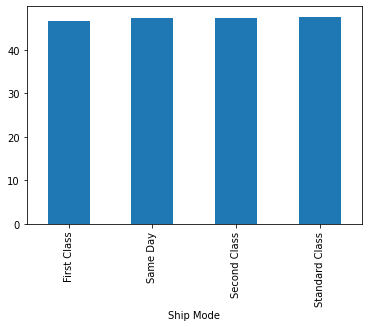

In [ ]:
analyse_profit.groupby('Ship Mode')['Profit%'].mean().plot.bar()

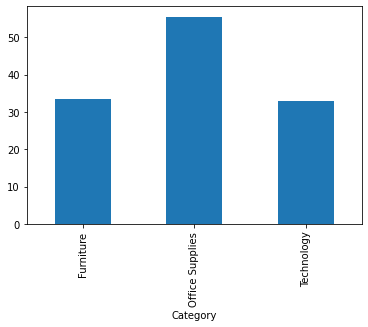

In [ ]:
analyse_profit.groupby('Category')['Profit%'].mean().plot.bar()

**C8 : Thus, we can say Office Supplies has made more profit than tech and furniture.**

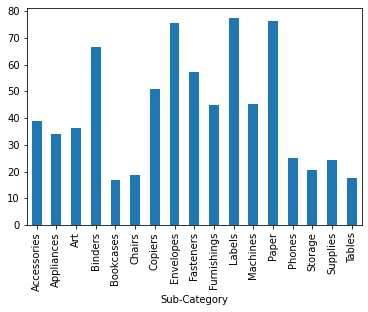

In [ ]:
analyse_profit.groupby('Sub-Category')['Profit%'].mean().plot.bar()

C9: We saw that Office supplies made most profit and among these office supplies paper and labels has brought out most profit.


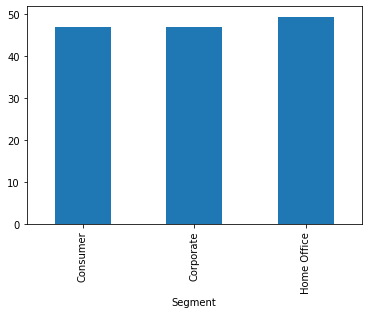

In [ ]:
analyse_profit.groupby('Segment')['Profit%'].mean().plot.bar()

Home office has made a little more contribution than Consumer and corporate segment.


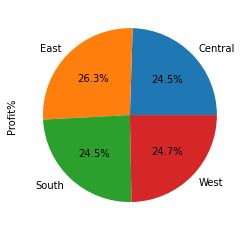

In [ ]:
analyse_profit.groupby('Region')['Profit%'].mean().plot.pie(autopct="%.1f%%")

There's not much difference in the Profit% region wise but east has made considerably more profit.

In [ ]:
analyse_profit.groupby('State')['Profit%'].mean()

State
Alabama                 57.035981
Arizona                 29.596523
Arkansas                66.037987
California              49.296384
Colorado                26.723697
Connecticut             59.535868
Delaware                61.867211
District of Columbia    74.969477
Florida                 29.573372
Georgia                 58.758111
Idaho                   45.027213
Illinois                31.171962
Indiana                 60.042150
Iowa                    71.072453
Kansas                  55.323261
Kentucky                56.021568
Louisiana               57.003986
Maine                   60.659094
Maryland                60.162794
Massachusetts           60.291566
Michigan                56.013903
Minnesota               62.775354
Mississippi             60.653238
Missouri                59.800716
Montana                 50.835528
Nebraska                55.741688
Nevada                  53.004812
New Hampshire           61.055753
New Jersey              58.659983
New Mexi

**C10: Most profit came from West Virgina State.**

---

---





# **Inferences based on these conclusions :**

## 1.Inferences from analyse_loss Dataset (Which has entries which suffered loss).

Loss is caused in -

                  Category : Office Supplies.
                  Sub-Category: Appliances and Binders.
                  City: Illionois and Texas.
                  Region: Central

## 2.Inferences from analyse_profit Dataset (Which has entries which made profit).      

Profit is made by -
     
                  Category : Office Supplies.
                  Sub-Category: Envelopes, Papers and Binders.
                  City: New York City
                  State: West Virginia
                  Region: Central

##Common Conclusion : See as we observe from above Office Supplies Category has made most loss from all the entries which suffered loss (Dataset 1: analyse_loss) and It has made most profit from entries which made profit (Dataset 2: analyse_profit) which implies that Office Supplies has been sold most.Same would be the case of Binders.

